# Project Overview

---
---

Background: The Garment Industry is one of the key examples of the industrial globalization of this modern era. The Garment Industry consists of a highly labor-intensive industry with plenty of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. Decision makers in the garments industry require the capability to track, analyse, and predict the productivity performance of the working teams in their factories. productivity_class

---
Aim: Developing productivity performance monitoring provides insights into the factors that influence productivity in the garment industry. By understanding these relationships, decision-makers can implement strategies to improve productivity, such as optimizing worker schedules, providing incentives, or adjusting targeted productivity goals. Additionally, predicting future productivity can help the management plan resources and set realistic expectations for performance.

---
---

# Objective 
---
---
Gain valuable insights into team performance and use this information to design an effective recognition program. The question below align with overall the aim for this project.

---

1. How does each team's average actual productivity compare to the overall average actual productivity across all teams?
2. Which team has the highest average actual productivity, and how does their performance stand out compared to other teams?
3. Are there any teams that consistently underperform compared to the overall average actual productivity?
4. How does the distribution of incentives look among the teams? Are there any notable patterns or trends that can be used to improve the recognition program?
5. Are there any notable patterns or trends that can be used to improve the recognition program?
6. How do the average incentives per team compare to the overall average incentive across all teams? This can show how fairly incentives are distributed among the teams.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import Libraries
---
---
- Import required Python libraries (e.g., NumPy, pandas, scikit-learn, etc.). 
- Establishes and prepares the Python environment for data analysis, visualization, and machine learning by importing necessary libraries and modules. 
- Prepare for data acquisition, preprocessing, model training, and evaluation.

---
--- 

In [2]:
# Import necessary libraries and modules
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import wrangle  # For data wrangling and preprocessing (user-defined module)
import acquire  # For data acquisition (user-defined module)
import prepare  # For data preparation before modeling (user-defined module)
import explore # For data exploration and visuals analysis before modeling (user-defined module)
import modeling # For model evaluation and validation (user-defined module)
# Import TimeSeriesSplit for splitting time series data for cross-validation
from sklearn.model_selection import TimeSeriesSplit

# Import mean_squared_error for evaluating regression model performance
from sklearn.metrics import mean_squared_error

# Import matplotlib for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# Import Holt method for time series forecasting
from statsmodels.tsa.holtwinters import Holt

# Import seasonal_decompose to decompose time series data into its components (trend, seasonality, and noise)
from statsmodels.tsa.seasonal import seasonal_decompose

# Import train_test_split for splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression and LogisticRegression for creating regression models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Import RandomForestRegressor for creating a random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Import mean_squared_error for regression model evaluation and accuracy_score for classification model evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [3]:
prepare.custom_visual()

---
---

# Import Dictionary

---
---
This code is creating a simple table that shows a list of software tools (modules) and their descriptions. It does this using a data structure called a data dictionary, which can be thought of as a container that stores related information in pairs.

In this case, the data dictionary has two parts: "Module" and "Description". Each part has a list of values. The "Module" part contains the names of various software tools, while the "Description" part contains a brief explanation of what each tool does.

- Imagine you have a recipe book, and you want to create a table of contents. The table of contents will have two columns - one for the name of the recipe (like "chocolate cake") and another for a short description of the recipe (like "a delicious cake made with cocoa and sugar"). The data dictionary in this code is just like that table of contents.
---
---

In [4]:
prepare.create_data_dict_df()

,Module,Description
0,pandas,"Pandas is a popular library for handling and analyzing data in a table format. It is often used for data manipulation tasks, like filtering, sorting, or aggregating data. The pd alias is used as a shorthand to refer to Pandas functions in the rest of the code."
1,numpy,"Numpy is another popular library for working with arrays and numerical data. It provides functions for mathematical operations, like addition, multiplication, or statistical calculations. The np alias is used as a shorthand."
2,seaborn,"Seaborn is a data visualization library built on top of Matplotlib (another visualization library). It simplifies the process of creating complex and informative graphs, making them visually appealing. The sns alias is used as a shorthand."
3,wrangle,"This imports a custom module named wrangle, which likely contains functions for data preprocessing, like cleaning or transforming the data."
4,acquire,"This imports a custom module named acquire, which probably contains functions to obtain data from external sources, like databases or APIs."
5,sklearn.model_selection.TimeSeriesSplit,"Scikit-learn is a widely used machine learning library, and this line imports the TimeSeriesSplit function, which is used to split time series data into training and testing sets for model validation."
6,sklearn.metrics.mean_squared_error,"This imports the mean_squared_error function from Scikit-learn, which is a metric used to evaluate the performance of regression models by calculating the average squared difference between the true and predicted values."
7,matplotlib.pyplot,Matplotlib is a widely used data visualization library in Python. This line imports its pyplot submodule and assigns it the alias plt for easier reference.
8,statsmodels.tsa.holtwinters.Holt,"Statsmodels is a library for statistical modeling in Python. This line imports the Holt function, which is an implementation of the Holt-Winters forecasting method for time series data."
9,statsmodels.tsa.seasonal.seasonal_decompose,"This line imports the seasonal_decompose function from Statsmodels, which is used to analyze and visualize the trend, seasonality, and residual components of a time series."


# Load Data
---
- Load the dataset garment factory productivy dataset
---

In [5]:
# Load the data (assuming it is in a CSV file named 'data.csv')
df = pd.read_csv('employee_productivity.csv')

In [6]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51



Column: date

Column: quarter

Column: department

Column: day

Column: team


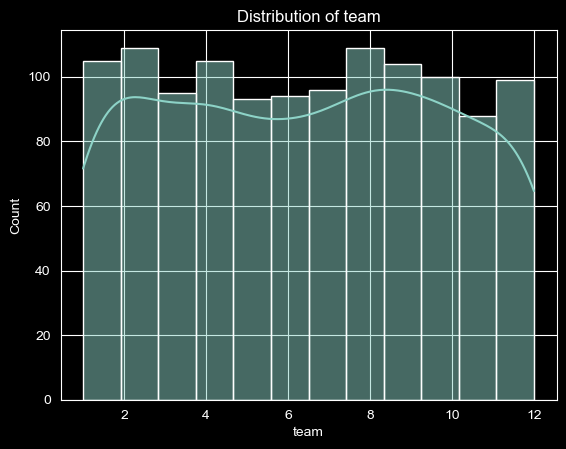


Column: targeted_productivity


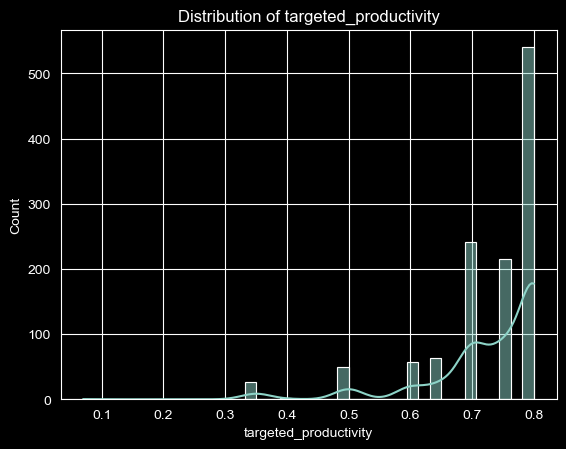


Column: smv


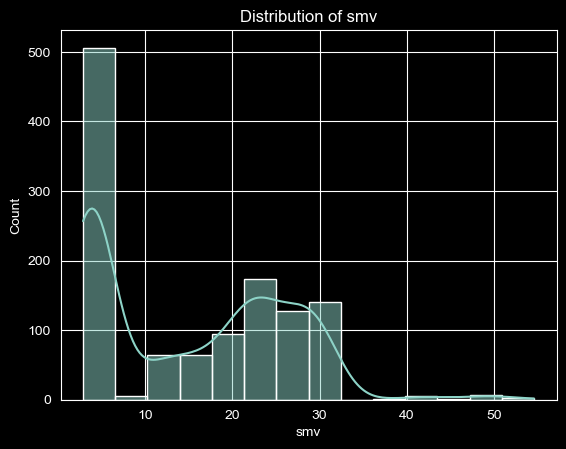


Column: wip


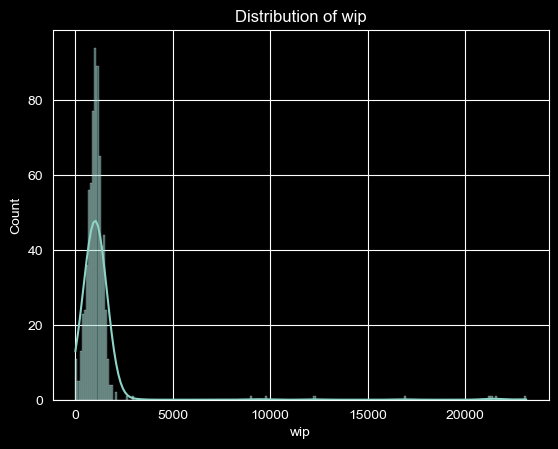


Column: over_time


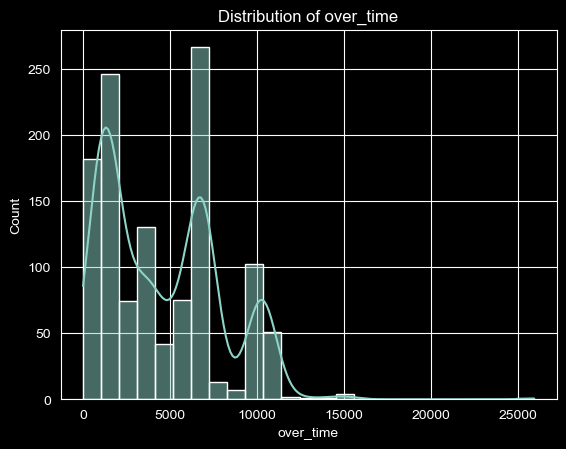


Column: incentive


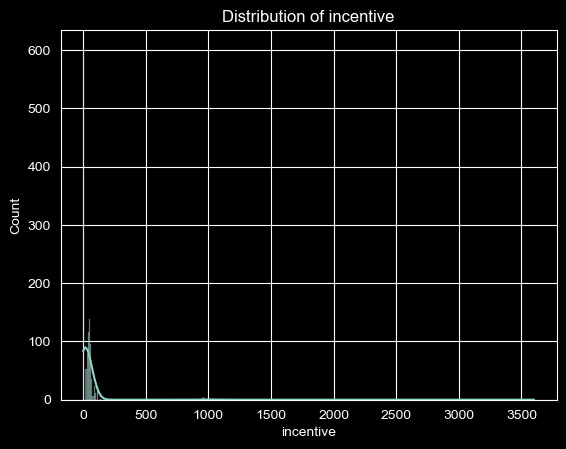


Column: idle_time


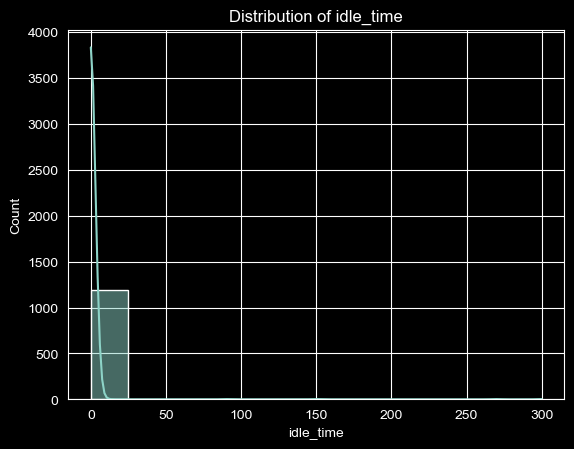


Column: idle_men


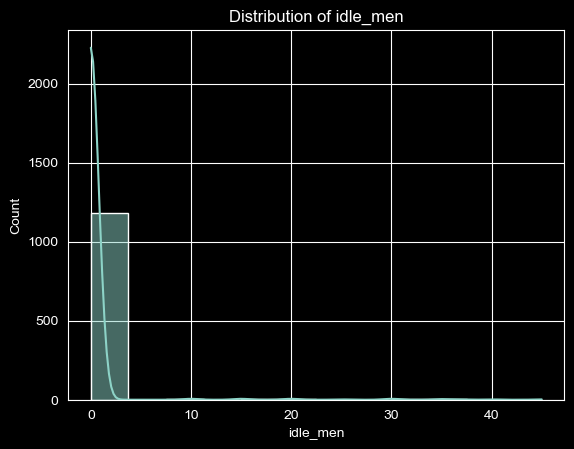


Column: no_of_style_change


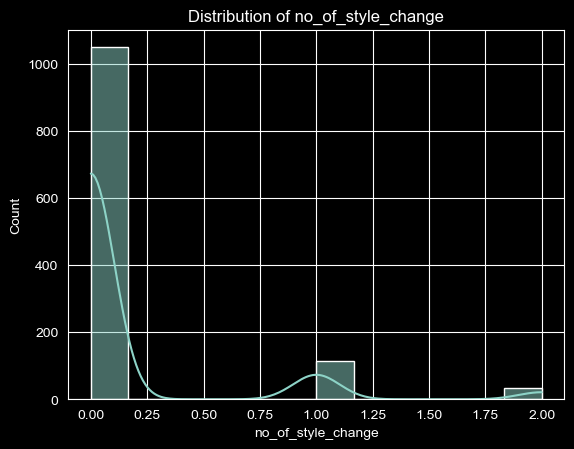


Column: no_of_workers


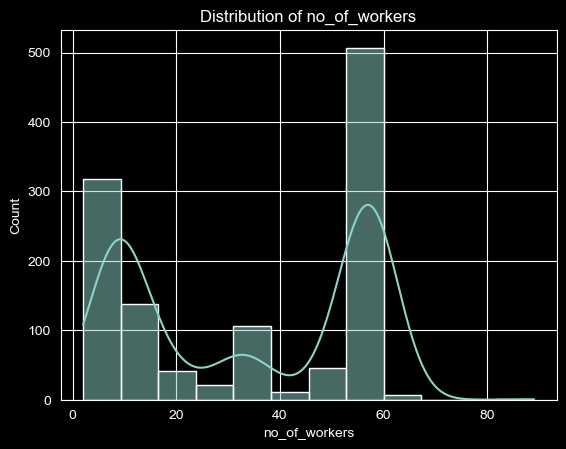


Column: actual_productivity


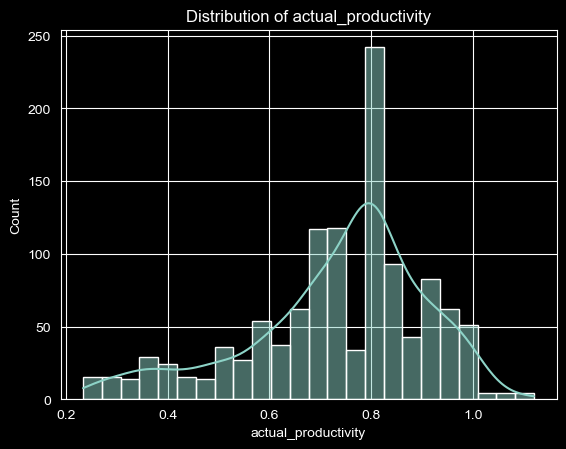

,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,...,unique,top,freq,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
date,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,59,3/11/2015,24,object,None,NaN,None,None,NaN,categorical
quarter,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,5,Quarter1,360,object,None,NaN,None,None,NaN,nominal
department,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,3,sweing,691,object,None,NaN,None,None,NaN,nominal
day,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,6,Wednesday,208,object,None,NaN,None,None,NaN,nominal
team,0.00,0.00,"1,197.00",0,0.00,6.43,3.46,1.00,3.00,6.00,...,NaN,NaN,NaN,int64,Non-normal,0.01,Right,Discrete,0.00,numerical
targeted_productivity,0.00,0.00,"1,197.00",0,0.00,0.73,0.10,0.07,0.70,0.75,...,NaN,NaN,NaN,float64,Non-normal,-2.14,Left,Discrete,79.00,ordinal
smv,0.00,0.00,"1,197.00",0,0.00,15.06,10.94,2.90,3.94,15.26,...,NaN,NaN,NaN,float64,Non-normal,0.41,Right,Continuous,0.00,numerical
wip,506.00,42.27,691.00,506,42.27,"1,190.47","1,837.46",7.00,774.50,"1,039.00",...,NaN,NaN,NaN,float64,Non-normal,9.72,Right,Continuous,22.00,numerical
over_time,0.00,0.00,"1,197.00",0,0.00,"4,567.46","3,348.82",0.00,"1,440.00","3,960.00",...,NaN,NaN,NaN,int64,Non-normal,0.67,Right,Continuous,1.00,numerical
incentive,0.00,0.00,"1,197.00",0,0.00,38.21,160.18,0.00,0.00,0.00,...,NaN,NaN,NaN,int64,Non-normal,15.77,Right,Discrete,11.00,numerical


In [7]:
wrangle.custom_describe(df)

Custom_describe takes a DataFrame "df" as input and returns a comprehensive description of the dataset. It includes additional statistical and distribution-related information that is not available in the default describe() function in pandas.

-- More importantly, obtained information can then be used to make informed decisions about feature engineering, data preprocessing, and model selection, ultimately improving the program's performance in predicting productivity.


1. The function then adds additional columns to desc, such as count_nulls, pct_nulls, num_rows_missing, pct_rows_missing, and dtype.
3. The function also applies several sub-functions to the DataFrame to calculate distribution_type, skewness, skew_type, data_type, num_outliers, and variable_type for each column.
4. The function calculates the correlations between numeric columns in the DataFrame and counts duplicates.
5. For each column in the DataFrame, the function prints the column name and, if the column is not of object dtype, it plots a histogram with kernel density estimation (KDE) and displays it.

---
## Summary Report
---
The dataset contains 15 variables (columns) and 1,197 observations (rows). The dataset includes numerical, ordinal, nominal, and categorical variables. 

- The column "wip" has 506 missing values, accounting for 42.27% of the total records, and 506 outliers.
- The "date" column contains 59 unique dates, with "3/11/2015" occurring the most frequently.

In [8]:
prepare.data_dict_garment()

,Column Name,Description
0,date,Date in MM-DD-YYYY
1,day,Day of the Week
2,quarter,A portion of the month. A month was divided into four quarters
3,department,Associated department with the instance
4,team,Associated team number with the instance
5,no_of_workers,Number of workers in each team
6,no_of_style_change,Number of changes in the style of a particular product
7,targeted_productivity,Targeted productivity set by the Authority for each team for each day.
8,smv,"Standard Minute Value, it is the allocated time for a task"
9,wip,Work in progress. Includes the number of unfinished items for products


---
## Garment Industry Summary
---
---
SMV (Standard Minute Value) is an important metric in the garment industry for determining the time needed to complete specific tasks. It can be used to calculate performance metrics and optimize production. Key calculations using SMV values include:

1. **Target production**: (Working hours * 60 * No. of workers) / SMV
2. **Efficiency**: (Actual production * SMV) / (No. of workers * Working hours * 60) * 100
3. **Production capacity**: (Working hours * 60 * No. of workers) / SMV


---
## Explore Data
---
- Perform exploratory data analysis (EDA) to understand the data distribution, missing values, and outliers.
- Include visualizations (e.g., histograms, scatter plots, box plots) to better understand the data.
- Performs calculations to determine different productivity metrics.
---

In [9]:
df['prod_capacity'] = (10 * 60 * df['no_of_workers']) / df['smv']

- Calculates the production capacity (in pieces per hour) for each row in the DataFrame. It does this by multiplying the number of workers, a fixed value of 10 (to convert hours to minutes), and 60 (to convert minutes to seconds), and then dividing by the SMV (Standard Minute Value), which is a measure of the time required to produce one piece.

- Calculation assumes that each worker produces one piece per hour.

In [10]:
df['actual_production'] = (df['targeted_productivity'] * 10 * 60 * df['no_of_workers']) / df['smv']

- Calculates the actual production (in pieces per hour) for each row in the DataFrame; by multiplying the targeted productivity (a measure of the desired output), a fixed value of 10 (to convert hours to minutes), the number of workers, and 60 (to convert minutes to seconds), and then dividing by the SMV.

In [11]:
df['actual_efficiency'] = (df['actual_production'] / df['prod_capacity'])

- Calculates the actual efficiency for each row in the DataFrame. It does this by dividing the actual production (calculated in the second line of code) by the production capacity (calculated in the first line of code). The resulting value represents the percentage of the production capacity that was actually achieved.

In [12]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_capacity,actual_production,actual_efficiency
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94,"1,353.21","1,082.57",0.80
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89,"1,218.27",913.71,0.75
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,"1,603.86","1,283.09",0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,"1,603.86","1,283.09",0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80,"1,297.30","1,037.84",0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,655.17","1,241.38",0.75
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,230.77",861.54,0.70
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,230.77",800.00,0.65
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51,"3,103.45","2,327.59",0.75



Column: date

Column: quarter

Column: department

Column: day

Column: team


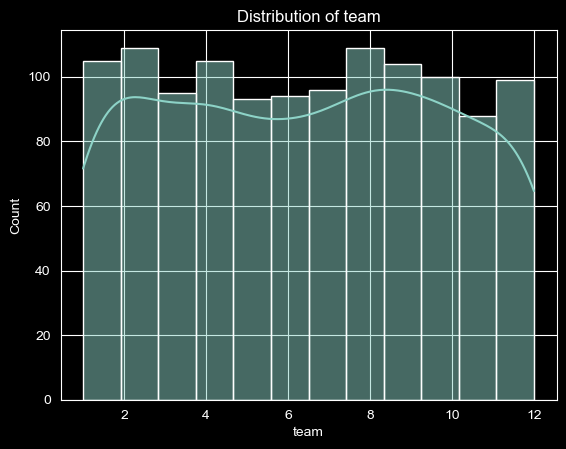


Column: targeted_productivity


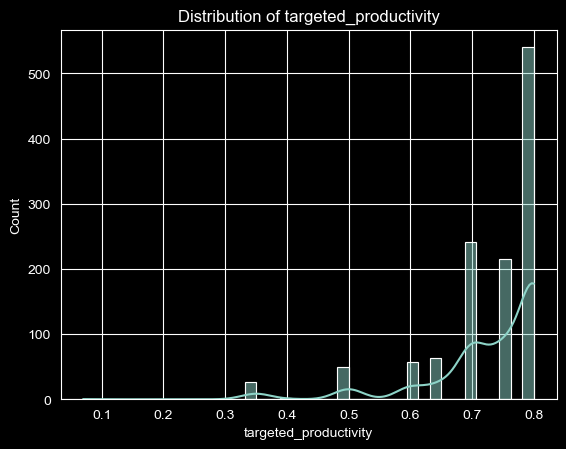


Column: smv


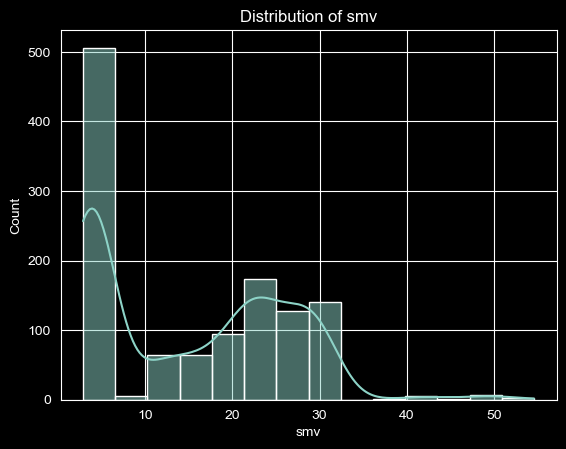


Column: wip


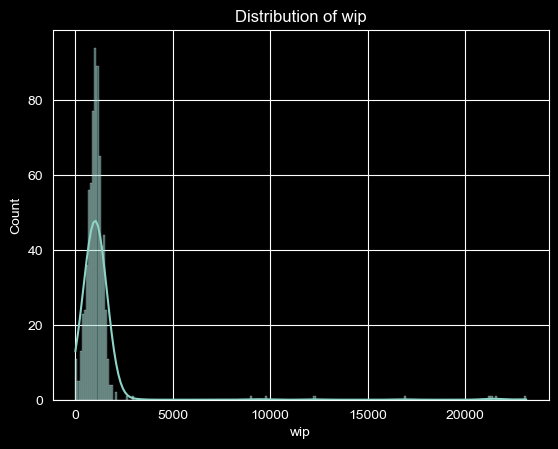


Column: over_time


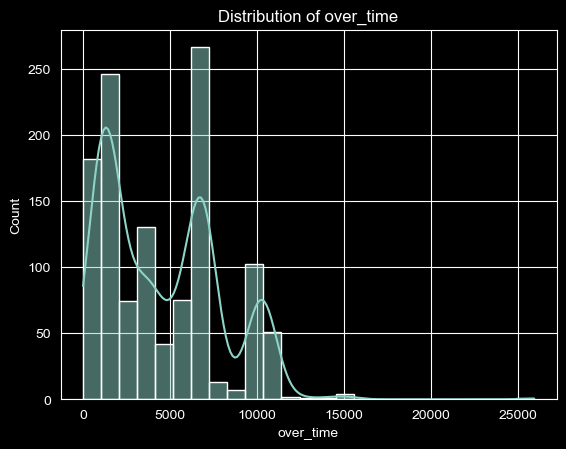


Column: incentive


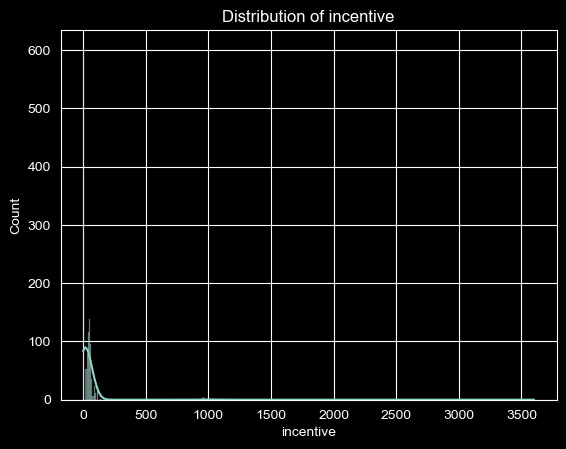


Column: idle_time


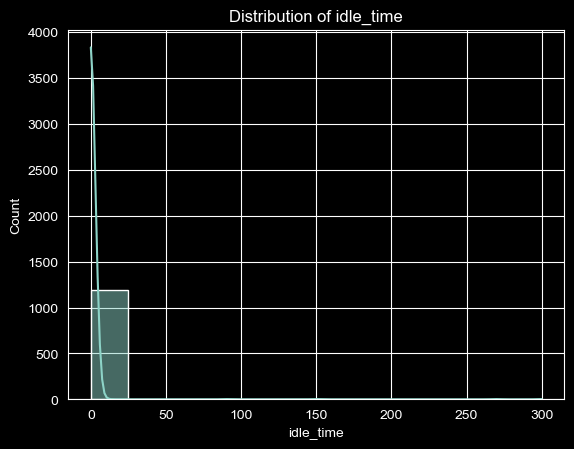


Column: idle_men


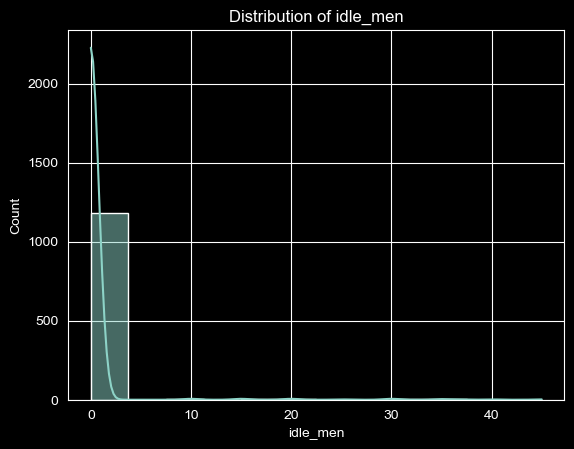


Column: no_of_style_change


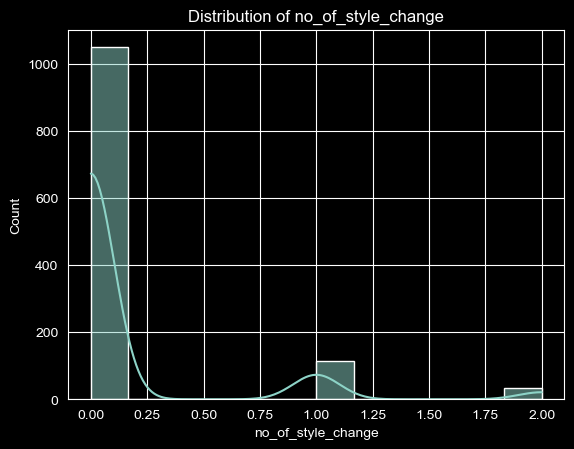


Column: no_of_workers


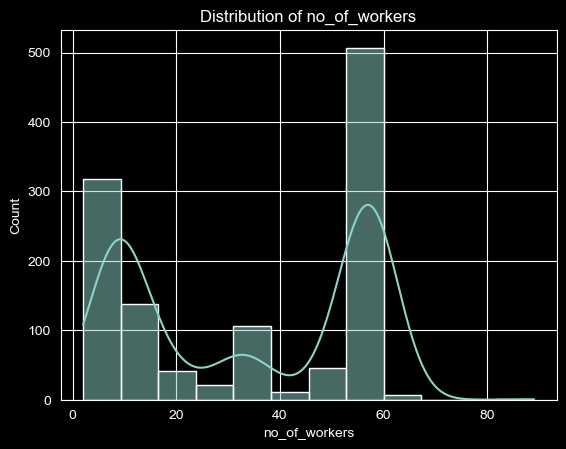


Column: actual_productivity


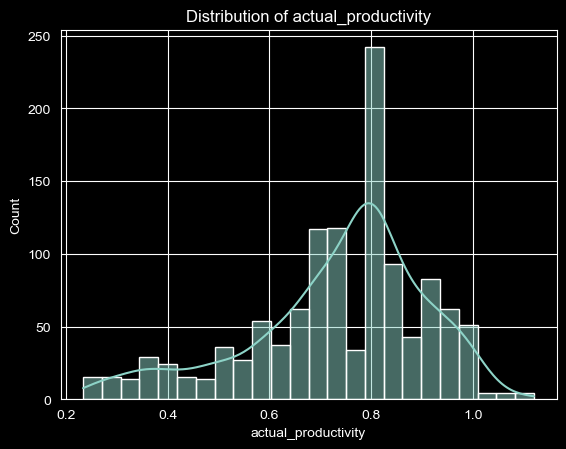


Column: prod_capacity


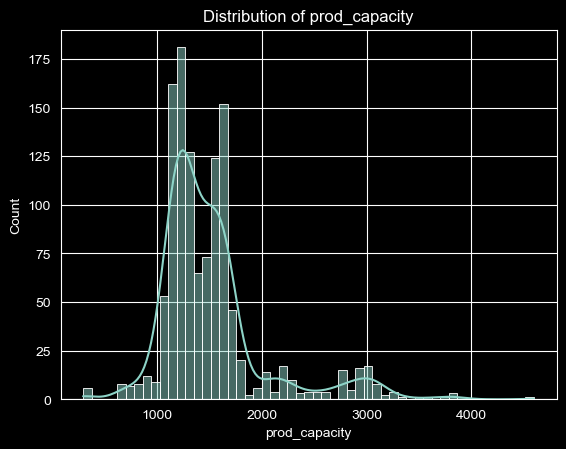


Column: actual_production


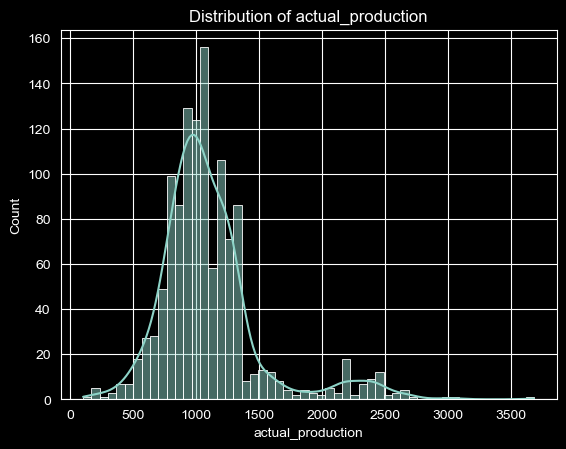


Column: actual_efficiency


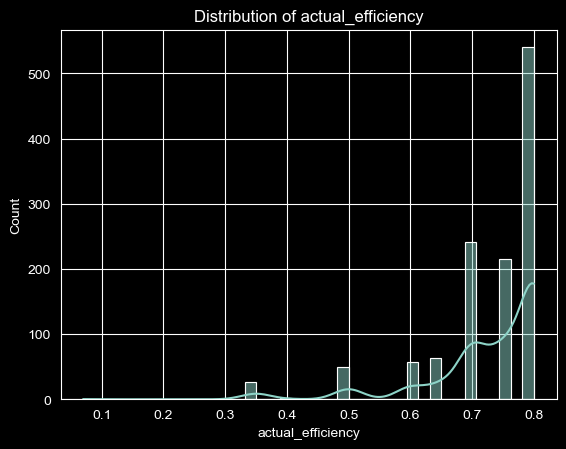

,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,...,unique,top,freq,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
date,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,59,3/11/2015,24,object,None,NaN,None,None,NaN,categorical
quarter,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,5,Quarter1,360,object,None,NaN,None,None,NaN,nominal
department,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,3,sweing,691,object,None,NaN,None,None,NaN,nominal
day,0,0.00,1197,0,0.00,NaN,NaN,NaN,NaN,NaN,...,6,Wednesday,208,object,None,NaN,None,None,NaN,nominal
team,0.00,0.00,"1,197.00",0,0.00,6.43,3.46,1.00,3.00,6.00,...,NaN,NaN,NaN,int64,Non-normal,0.01,Right,Discrete,0.00,numerical
targeted_productivity,0.00,0.00,"1,197.00",0,0.00,0.73,0.10,0.07,0.70,0.75,...,NaN,NaN,NaN,float64,Non-normal,-2.14,Left,Discrete,79.00,ordinal
smv,0.00,0.00,"1,197.00",0,0.00,15.06,10.94,2.90,3.94,15.26,...,NaN,NaN,NaN,float64,Non-normal,0.41,Right,Continuous,0.00,numerical
wip,506.00,42.27,691.00,506,42.27,"1,190.47","1,837.46",7.00,774.50,"1,039.00",...,NaN,NaN,NaN,float64,Non-normal,9.72,Right,Continuous,22.00,numerical
over_time,0.00,0.00,"1,197.00",0,0.00,"4,567.46","3,348.82",0.00,"1,440.00","3,960.00",...,NaN,NaN,NaN,int64,Non-normal,0.67,Right,Continuous,1.00,numerical
incentive,0.00,0.00,"1,197.00",0,0.00,38.21,160.18,0.00,0.00,0.00,...,NaN,NaN,NaN,int64,Non-normal,15.77,Right,Discrete,11.00,numerical


In [13]:
wrangle.custom_describe(df)

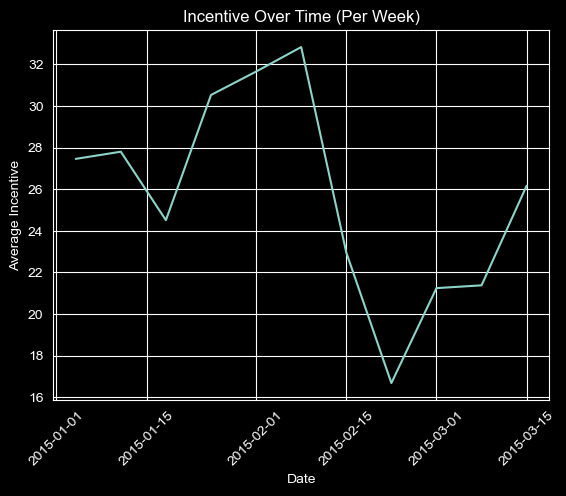

In [14]:
explore.incentive_over_time(df)

- Calculates the average incentive per month, and plotting the result in a line chart. 

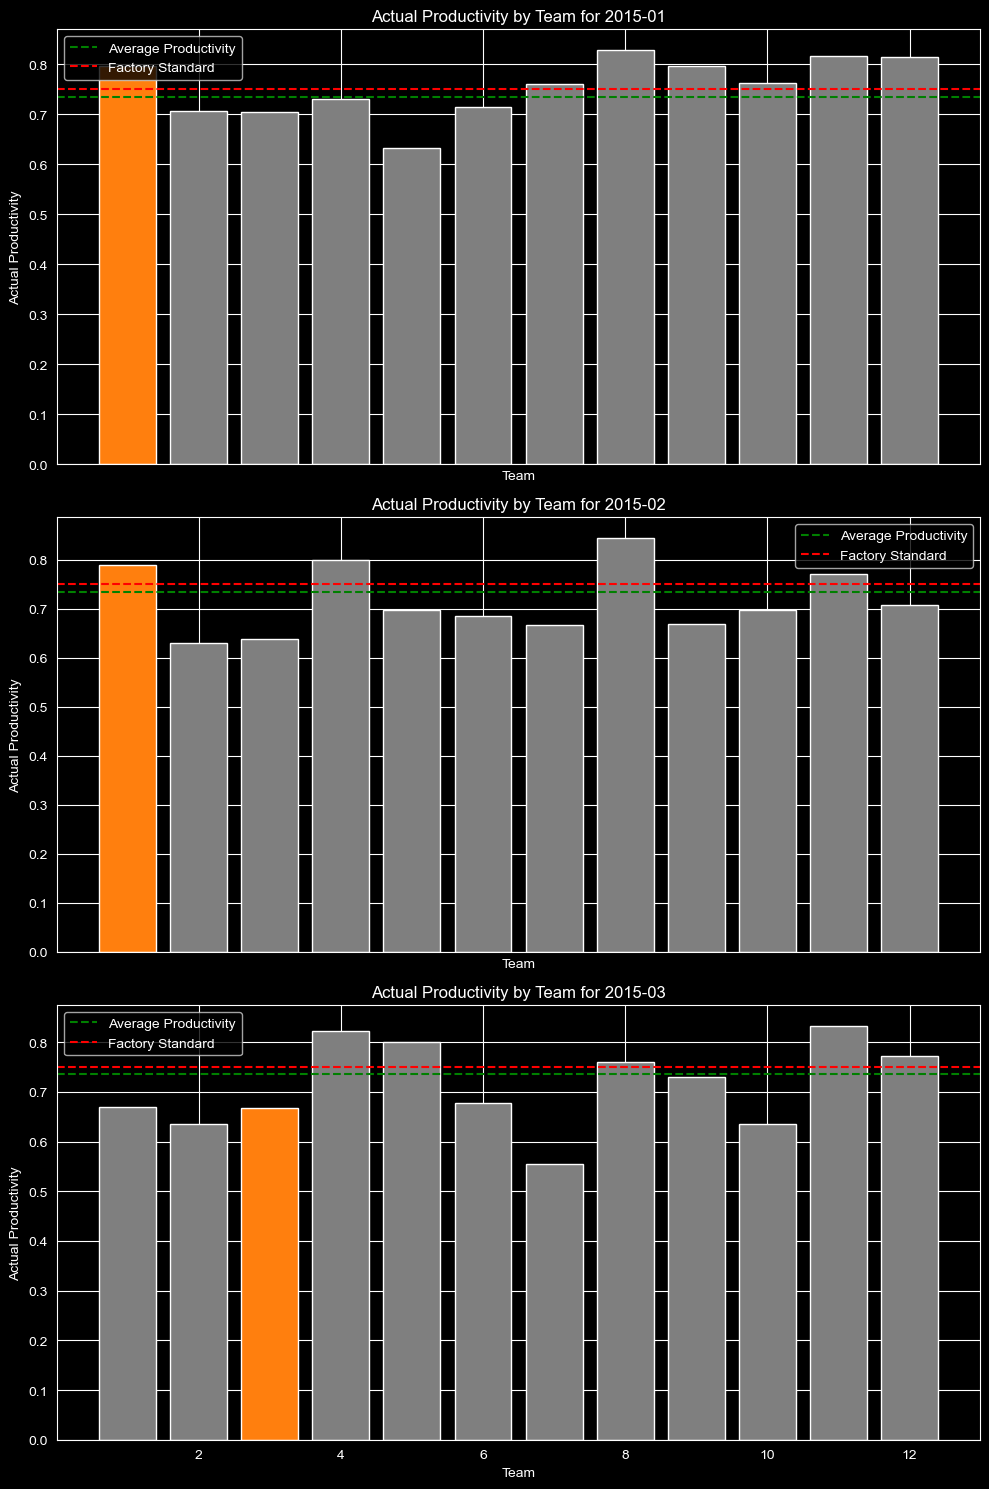

In [15]:
explore.plot_monthly_productivity_by_team(df)

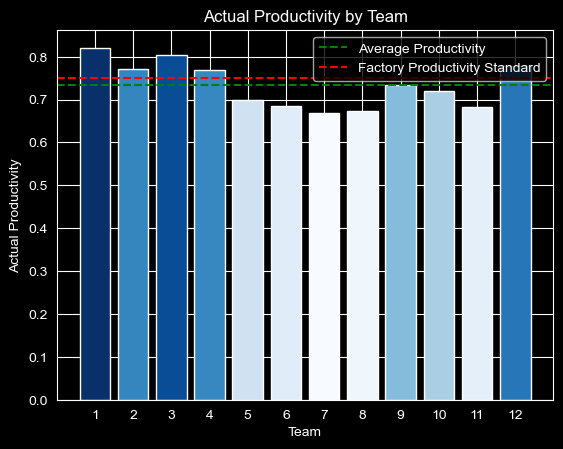

In [16]:
explore.plot_actual_productivity(df)

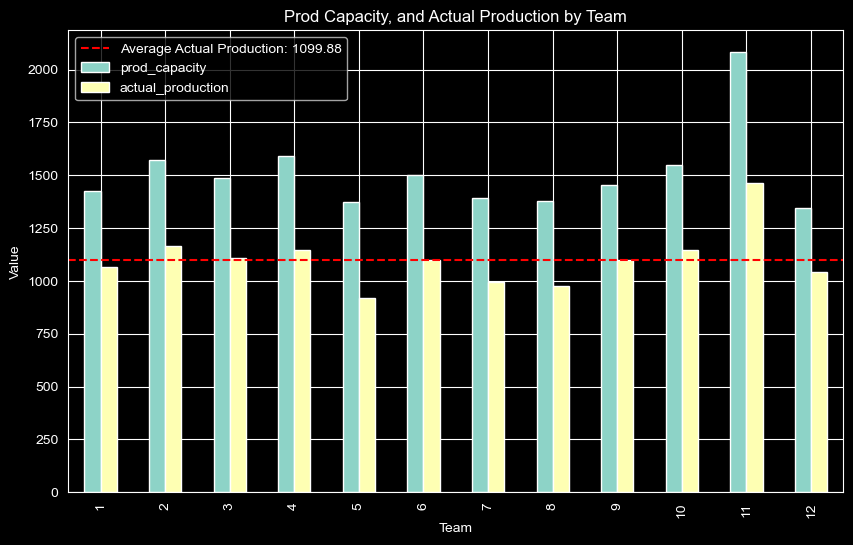

In [17]:
explore.plot_production_data(df)

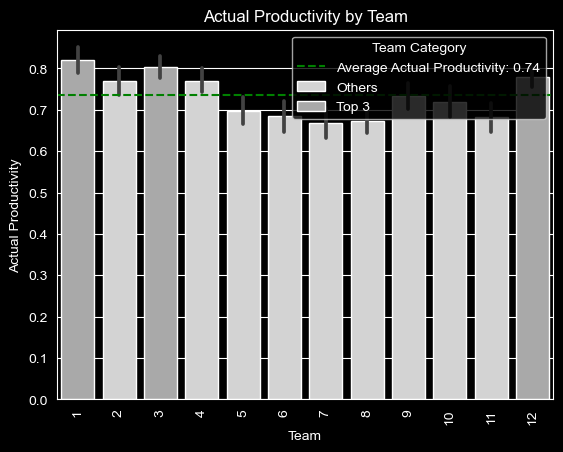

In [18]:
explore.productivity_by_team(df)

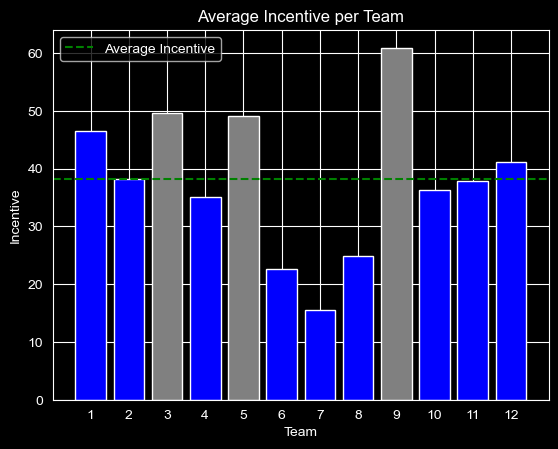

In [19]:
explore.plot_average_incentive(df)

- Calculates the average incentive per team and overall average incentive across all teams in relation to the garment recognition program. It then identifies the top 3 teams by their average incentives and creates a custom color list to highlight these teams in red on the bar chart, with the other teams shown in blue. A green dashed line represents the overall average incentive.

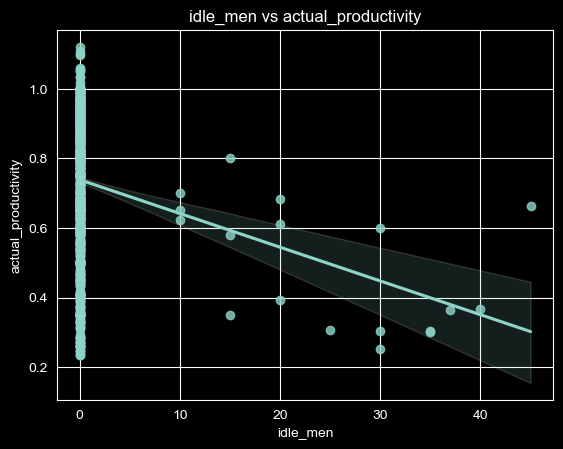

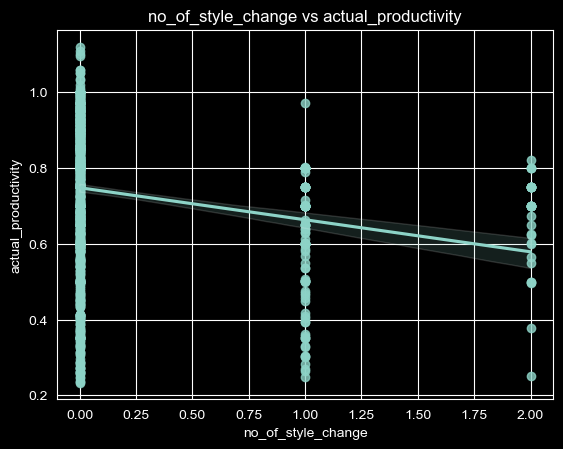

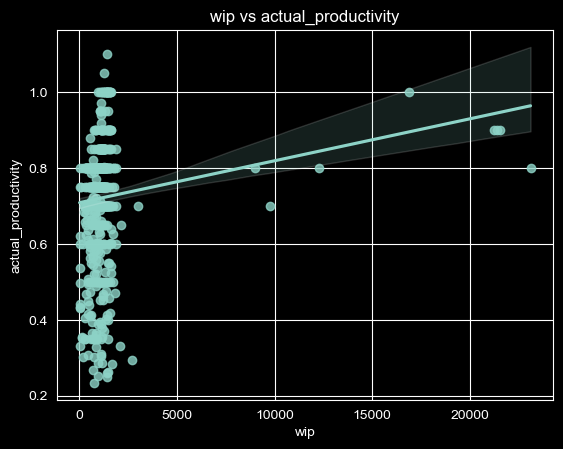

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatterplots with fitted lines for each significant predictor
significant_predictors = ['idle_men','no_of_style_change', 'wip']

for predictor in significant_predictors:
    sns.regplot(x=predictor, y='actual_productivity', data=df)
    plt.title(f'{predictor} vs actual_productivity')
    plt.show()

This code creates a scatterplot with a regression line to visualize the relationship between wip, ilde_men, no_of_style_change, and actual productivity.

This code and chart contribute to the objectives of the garment recognition program by:

1. Investigating the relationship between actual productivity.
2. Visualizing the correlation between these variables to understand if wip, idle_men, or no_of_style_change leads to an increase or decrease in productivity.

The regression line helps to illustrate the trend, giving insights into whether productivity is effected by the other features. This information can be valuable for decision-makers in the garment recognition program when designing incentive schemes to boost productivity.

# Data Preprocessing
---
## Handling Missing Values
---
- 506 outliers remain.
- Found misspelling in departments...correct all misspelled words and strip the whitespace from the column.
- xxx Converted NaN values to '0' for wip. WIP doesnt affect the modeling.
- Dropped 7 columns
---

---
---

In [21]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_capacity,actual_production,actual_efficiency,month,highlight
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94,"1,353.21","1,082.57",0.80,2015-01,Others
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89,"1,218.27",913.71,0.75,2015-01,Top 3
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,"1,603.86","1,283.09",0.80,2015-01,Others
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,"1,603.86","1,283.09",0.80,2015-01,Top 3
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80,"1,297.30","1,037.84",0.80,2015-01,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,655.17","1,241.38",0.75,2015-03,Others
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,230.77",861.54,0.70,2015-03,Others
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.00,0,0,8.00,0.63,"1,230.77",800.00,0.65,2015-03,Others
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.00,0,0,15.00,0.51,"3,103.45","2,327.59",0.75,2015-03,Others


In [22]:
prepare.clean_data(df)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,highlight
0,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94,Others
1,1,0.75,3.94,0.00,960,0,0.00,0,0,8.00,0.89,Top 3
2,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,Others
3,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,Top 3
4,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1193,8,0.70,3.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1194,7,0.65,3.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1195,9,0.75,2.90,0.00,1800,0,0.00,0,0,15.00,0.51,Others


In [23]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,highlight
0,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94,Others
1,1,0.75,3.94,0.00,960,0,0.00,0,0,8.00,0.89,Top 3
2,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,Others
3,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80,Top 3
4,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1193,8,0.70,3.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1194,7,0.65,3.90,0.00,960,0,0.00,0,0,8.00,0.63,Others
1195,9,0.75,2.90,0.00,1800,0,0.00,0,0,15.00,0.51,Others


In [27]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,"1,108.00",7080,98,0.00,0,0,59.00,0.94
1,1,0.75,3.94,0.00,960,0,0.00,0,0,8.00,0.89
2,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,6,0.80,25.90,"1,170.00",1920,50,0.00,0,0,56.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0.00,960,0,0.00,0,0,8.00,0.63
1193,8,0.70,3.90,0.00,960,0,0.00,0,0,8.00,0.63
1194,7,0.65,3.90,0.00,960,0,0.00,0,0,8.00,0.63
1195,9,0.75,2.90,0.00,1800,0,0.00,0,0,15.00,0.51


- Groups the dataset by 'team' and calculate the mean actual productivity for each team. This step helps evaluate each team's average performance based on their actual productivity.
- Identified the top 3 teams with the highest mean actual productivity by sorting the calculated values in descending order and selecting the top 3 entries. This information is crucial for the recognition program, as it helps identify the best-performing teams that deserve rewards and recognition.
- By obtaining the top 3 teams based on their actual productivity, the company can create an effective recognition program that acknowledges and rewards outstanding performance, which in turn can boost overall productivity and efficiency.

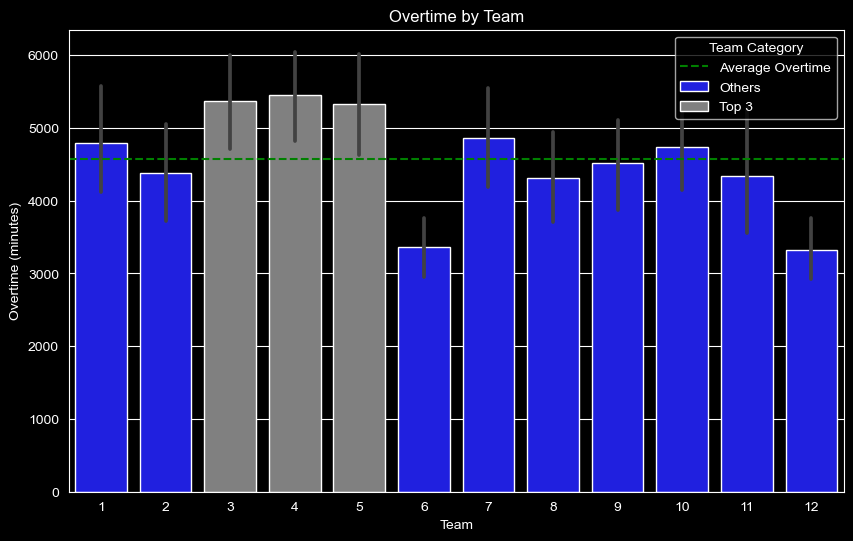

In [24]:
explore.avg_team_ot(df)

This code creates a bar chart to visualize the overtime by team, highlighting the top 3 teams with the most overtime and comparing it to the average overtime across all teams.

Comments on the code:

1. Calculate the average overtime across all teams in the dataset `df` and store it in the variable `avg_overtime`.
2. Find the top 3 teams with the most overtime by grouping the data by team, calculating the mean overtime for each team, sorting the results in descending order, and getting the indices of the top 3 teams. Store the result in `top_3_overtime_teams`.
3. Create a new column 'highlight' in the dataset `df` to indicate if the team is in the top 3 or not.
4. Create a new figure with a specified size.
5. Use seaborn's `barplot()` function to create a bar chart with 'team' on the x-axis and 'over_time' on the y-axis, using the 'highlight' column as the hue parameter. Set the color palette for the bars, making sure not to dodge the bars (display them on top of each other).
6. Add a horizontal dashed line to the plot at the average overtime level.
7. Set the plot title, x-axis label, y-axis label, and display the legend.
8. Display the plot.

This code and chart help answer the following questions about the garment recognition program:

1. Which teams have the most overtime?
2. How does the overtime of each team compare to the average overtime across all teams?

The visualization provides insights into the distribution of overtime across teams and helps identify the teams with the highest amount of overtime, which could indicate a higher workload or potential inefficiencies in the garment recognition program.

In [25]:
df.drop(columns='highlight', inplace=True)

In [28]:
wrangle.feature_correlation(df)

Feature: team
Pearson correlation coefficient: -0.14875331064277764
P-value: 2.3417931360661362e-07


Spearman correlation coefficient: -0.16369609501827312
P-value: 1.2261278523786041e-08
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: targeted_productivity
Pearson correlation coefficient: 0.42159388370015116
P-value: 8.997899153170046e-53


Spearman correlation coefficient: 0.44837460580347377
P-value: 2.943559170541725e-60
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: smv
Pearson correlation coefficient: -0.1220888407255817
P-value: 2.2811300110670583e-05


Spearman correlation coefficient: -0.1223029320353683
P-value: 2.2063496082492056e-05
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: wip
Pearson correlation coefficient: 0.04738879861935253
P-value: 0.10126521101764331


Spearman correlation coefficient: -0.05810296580050121
P-value: 0.04444959875193139
Fail to reject the null hypothesis (H0

- Provides the correlation coefficients (both Pearson and Spearman) between various features and the actual productivity, as well as the corresponding p-values for hypothesis testing. The project's objective is to understand the factors affecting the actual productivity of the workers in the garment industry.

- Highlights relationships between various features and actual productivity. The findings can be used to improve productivity by focusing on factors with stronger relationships, such as targeted productivity, incentives, and reducing the number of style changes.

1. **Team:** A weak negative linear relationship exists between the team and actual productivity, indicating that different teams have varying productivity levels.

2. **Targeted Productivity:** A moderate positive linear relationship exists between targeted productivity and actual productivity, suggesting that setting higher productivity targets is associated with higher actual productivity.

3. **SMV (Standard Minute Value):** A weak negative linear relationship exists between SMV and actual productivity, indicating that more complex tasks (higher SMV) could result in lower productivity.

4. **WIP (Work In Progress):** Suggests that there is no evidence of a linear relationship, but a monotonic relationship might exist. The relationship between WIP and actual productivity is weak and inconclusive.

5. **Over Time:** Indicates that there is no evidence of a linear relationship, but a monotonic relationship might exist between over time and actual productivity. The relationship is weak and inconclusive.

6. **Incentive:** A weak positive linear relationship exists between incentive and actual productivity, suggesting that providing incentives might be associated with increased productivity.

7. **Idle Time:** A weak negative linear relationship exists between idle time and actual productivity, indicating that more idle time corresponds to lower productivity.

8. **Idle Men:** A weak negative linear relationship exists between idle men and actual productivity, suggesting that having more idle workers is associated with lower productivity.

9. **No of Style Change:** A weak to moderate negative linear relationship exists between the number of style changes and actual productivity, indicating that frequent style changes can lead to lower productivity.

10. **No of Workers:** Indicates that there is a weak linear relationship, but no evidence of a monotonic relationship between the number of workers and actual productivity. The relationship is weak and inconclusive.


In [29]:
wrangle.check_feature_importance(df)

team: -0.009023974505600732
targeted_productivity: 0.7044015191334676
smv: -0.007105139109448902
wip: 3.831793635912476e-06
over_time: -4.54653005197116e-06
incentive: 4.9958137774605274e-05
idle_time: 0.00045248280805606844
idle_men: -0.008666193181703063
no_of_style_change: -0.04631388920406742
no_of_workers: 0.0036974655298277937


- Identify the most important features that influence actual productivity. The code does not produce a chart, but it answers the following questions:

1. What are the most important features that contribute to a team's actual productivity? By using a Decision Tree Regressor, this code ranks the features based on their importance and iteratively removes the least important feature until the desired number of features is reached (in this case, 6).

2. Which features have the least impact on actual productivity? The least important features are removed from the dataset during the Recursive Feature Elimination (RFE) process. This information can help the company focus on the most relevant factors when designing the recognition program.

3. How can the company use the selected features to improve the recognition program? By understanding the most important features affecting actual productivity, the company can tailor the program to target those aspects, thereby maximizing the program's impact on employee performance and productivity.

In [30]:
wrangle.feature_elimination(df)

Selected columns: Index(['team', 'targeted_productivity', 'smv', 'idle_men',
       'no_of_style_change', 'no_of_workers'],
      dtype='object')


- Performs feature elimination, which helps identify the most important features that affect the actual productivity in the garment industry. The objective of the project is to understand the factors influencing the actual productivity of workers and to potentially improve productivity.

- Ultilizes some feature selection technique, possibly similar to the Recursive Feature Elimination (RFE) method, to determine the most relevant features. In this case, the function has selected the following six features:

1. `team`: The team to which a worker belongs.
2. `targeted_productivity`: The productivity target set for a worker or a team.
3. `smv`: Standard Minute Value, which represents the complexity of a task.
4. `idle_men`: The number of idle workers during a specific period.
5. `no_of_style_change`: The number of style changes in the production process.
6. `no_of_workers`: The number of workers in a team or working on a task.

- The feature elimination process identified these six features as the most important factors affecting actual productivity. By focusing on these selected features, the project can better understand the factors impacting productivity and develop strategies to improve it.

In [31]:
df.drop(['wip', 'over_time', 'incentive', 'idle_time'], axis=1, inplace=True)

In [32]:
df

,team,targeted_productivity,smv,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,0,0,59.00,0.94
1,1,0.75,3.94,0,0,8.00,0.89
2,11,0.80,11.41,0,0,30.50,0.80
3,12,0.80,11.41,0,0,30.50,0.80
4,6,0.80,25.90,0,0,56.00,0.80
...,...,...,...,...,...,...,...
1192,10,0.75,2.90,0,0,8.00,0.63
1193,8,0.70,3.90,0,0,8.00,0.63
1194,7,0.65,3.90,0,0,8.00,0.63
1195,9,0.75,2.90,0,0,15.00,0.51


In [33]:
df.drop(columns='targeted_productivity', inplace=True)

In [34]:
df

,team,smv,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,26.16,0,0,59.00,0.94
1,1,3.94,0,0,8.00,0.89
2,11,11.41,0,0,30.50,0.80
3,12,11.41,0,0,30.50,0.80
4,6,25.90,0,0,56.00,0.80
...,...,...,...,...,...,...
1192,10,2.90,0,0,8.00,0.63
1193,8,3.90,0,0,8.00,0.63
1194,7,3.90,0,0,8.00,0.63
1195,9,2.90,0,0,15.00,0.51


In [35]:
modeling.baseline_metrics(df)

Baseline Metrics
R2 score: 0.06558616437542109
MSE: 0.027927816980557116
RMSE: 0.1671161780934363
Accuracy score: 0.8916666666666667


---
## Feature Engineering
---
- Created and added a productivity_class as the target for the classification models.
- Provide a rationale for the new features and their expected impact on model performance.
- Apply the feature engineering techniques to the dataset.

In [36]:
modeling.add_productivity_class(df)

,team,smv,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_class
0,8,26.16,0,0,59.00,0.94,2
1,1,3.94,0,0,8.00,0.89,2
2,11,11.41,0,0,30.50,0.80,2
3,12,11.41,0,0,30.50,0.80,2
4,6,25.90,0,0,56.00,0.80,2
...,...,...,...,...,...,...,...
1192,10,2.90,0,0,8.00,0.63,1
1193,8,3.90,0,0,8.00,0.63,1
1194,7,3.90,0,0,8.00,0.63,1
1195,9,2.90,0,0,15.00,0.51,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('productivity_class', axis=1), df['productivity_class'], test_size=0.3, random_state=42)

# Split the train set further into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = [LinearRegression(), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    
    # Predict on validation and test sets and evaluate performance
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    r2_val = r2_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)
    accuracy_val = accuracy_score(y_val, y_pred_val.round())

    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    accuracy_test = accuracy_score(y_test, y_pred_test.round())

    # Predict on training set and evaluate performance
    y_pred_train = model.predict(X_train)

    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    accuracy_train = accuracy_score(y_train, y_pred_train.round())

    print(f"\n{type(model).__name__} - Training Set:")
    print("R2 score:", r2_train)
    print("MSE:", mse_train)
    print("RMSE:", rmse_train)
    print("Accuracy score:", accuracy_train)

    print(f"\n{type(model).__name__} - Validation Set:")
    print("R2 score:", r2_val)
    print("MSE:", mse_val)
    print("RMSE:", rmse_val)
    print("Accuracy score:", accuracy_val)

    print(f"\n{type(model).__name__} - Test Set:")
    print("R2 score:", r2_test)
    print("MSE:", mse_test)
    print("RMSE:", rmse_test)
    print("Accuracy score:", accuracy_test)


LinearRegression - Training Set:
R2 score: 0.7320056113577922
MSE: 0.06881876456315217
RMSE: 0.26233330814662514
Accuracy score: 0.9596412556053812

LinearRegression - Validation Set:
R2 score: 0.7625322822804756
MSE: 0.07450314060396784
RMSE: 0.27295263435982414
Accuracy score: 0.9166666666666666

LinearRegression - Test Set:
R2 score: 0.7134151343164945
MSE: 0.08207472125547062
RMSE: 0.28648686052849026
Accuracy score: 0.9305555555555556

DecisionTreeClassifier - Training Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

DecisionTreeClassifier - Validation Set:
R2 score: 0.9810276679841897
MSE: 0.005952380952380952
RMSE: 0.07715167498104596
Accuracy score: 0.9940476190476191

DecisionTreeClassifier - Test Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

RandomForestClassifier - Training Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

RandomForestClassifier - Validation Set:
R2 score: 0.9810276679841897
MSE: 0.005952380952380952
RMSE: 0.07715167498104596

---
# Train-Test Split
---
- Divide the dataset into training and testing sets (mention the chosen split ratio, e.g., 80-20 or 70-30).

The function takes the following arguments:

df: the input pandas DataFrame containing the data
features: a list of column names for the features to be used in modeling
target_regression: the name of the column containing the regression target variable
target_classification: the name of the column containing the classification target variable
test_size: the proportion of the data to be allocated to the test set
random_state: the random seed for reproducibility
The function returns the following tuples:

X_train_reg, X_val_reg, X_test_reg: the training, validation, and test sets for regression
y_train_reg, y_val_reg, y_test_reg: the corresponding regression target variables
X_train_cls, X_val_cls, X_test_cls: the training, validation, and test sets for classification
y_train_cls, y_val_cls, y_test_cls: the corresponding classification target variables

In [38]:
# Separate the features and target variables
X = df.drop(['actual_productivity', 'productivity_class',], axis=1)
y_regression = df['actual_productivity']
y_classification = df['productivity_class']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)

---
# Model Selection
---
- Select machine learning model(s) for your project (e.g., logistic regression, SVM, decision trees, random forests, gradient boosting, etc.
---

In [39]:
wrangle.model_selection(df,'productivity_class')

Linear Regression: Mean Squared Error = 0.0785, R^2 Score = 0.6983
Lasso: Mean Squared Error = 0.2775, R^2 Score = -0.0502
Ridge: Mean Squared Error = 0.0786, R^2 Score = 0.6984
ElasticNet: Mean Squared Error = 0.2779, R^2 Score = -0.0515
Decision Tree: Mean Squared Error = 0.0017, R^2 Score = 0.9923
Random Forest: Mean Squared Error = 0.0015, R^2 Score = 0.9932
Gradient Boosting: Mean Squared Error = 0.0017, R^2 Score = 0.9923
XGBoost: Mean Squared Error = 0.0017, R^2 Score = 0.9923


In [ ]:
df

This code uses the `wrangle.model_selection` function to compare different machine learning models based on their Mean Squared Error (MSE) and R^2 Score when predicting the 'productivity_class' target variable in the given dataset `df`.

Comments on the code:

1. Call the `wrangle.model_selection` function with the DataFrame `df` and the target variable 'productivity_class'.
2. The function trains and evaluates various machine learning models, including Linear Regression, Lasso, Ridge, ElasticNet, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.
3. The function prints the Mean Squared Error (MSE) and R^2 Score for each model, providing a comparison of their performance on the dataset.

This code and output contribute to the objectives of the garment recognition program by:

1. Identifying the best machine learning model to predict productivity_class based on the dataset.
2. Evaluating the performance of each model using the Mean Squared Error (MSE) and R^2 Score, which provides insights into how well the model fits the data and how accurately it can predict the target variable.

By comparing the performance of different models, the garment recognition program can choose the most suitable model for predicting productivity_class. This can help decision-makers to better understand the factors affecting productivity and implement strategies to improve it. In this case, the Random Forest model shows the best performance, with the lowest MSE (0.0014) and the highest R^2 Score (0.9934), indicating that it's the most suitable model for this task.

# Model Training

- Train the  model using selected model xx.
---

In [40]:
modeling.model_all(df)


DecisionTreeClassifier - Training Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

DecisionTreeClassifier - Validation Set:
R2 score: 0.9810276679841897
MSE: 0.005952380952380952
RMSE: 0.07715167498104596
Accuracy score: 0.9940476190476191

DecisionTreeClassifier - Test Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

RandomForestClassifier - Training Set:
R2 score: 1.0
MSE: 0.0
RMSE: 0.0
Accuracy score: 1.0

RandomForestClassifier - Validation Set:
R2 score: 0.9810276679841897
MSE: 0.005952380952380952
RMSE: 0.07715167498104596
Accuracy score: 0.9940476190476191

RandomForestClassifier - Test Set:
R2 score: 0.9709020368574199
MSE: 0.008333333333333333
RMSE: 0.09128709291752768
Accuracy score: 0.9916666666666667


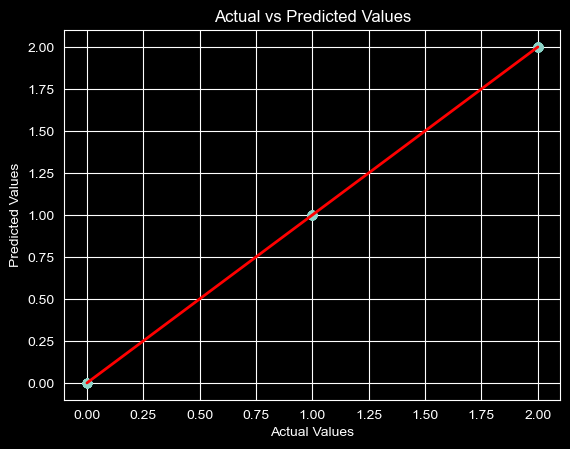

In [41]:
model = DecisionTreeClassifier()
explore.actual_vs_predicted(X_train, X_test, y_train, y_test, model)

# Model Evaluation
---
- Evaluate the model's performance on the test set using appropriate metrics (e.g., accuracy, F1-score, precision, recall for classifiers; MSE, MAE, R-squared for regression.
---

In [42]:
modeling.model_eval(df,'productivity_class')

Best Model: Decision Tree, Accuracy score: 1.000


# Conclusion
---
---
1. How does each team's average actual productivity compare to the overall average actual productivity across all teams? 
-  Each of team averages are similiar but some team perform bette than others.
2. Which team has the highest average actual productivity, and how does their performance stand out compared to other teams?
- 
3. Are there any teams that consistently underperform compared to the overall average actual productivity?
- 
4.  How does the distribution of incentives look among the teams? Are there any notable patterns or trends that can be used to improve the recognition program?
- 
5. Are there any notable patterns or trends that can be used to improve the recognition program?
- 
6. How do the average incentives per team compare to the overall average incentive across all teams? This can show how fairly incentives are distributed among the teams.


# Next Steps
---
---

# Recommendations 
---
---


# References (Optional)

- List any references, articles, or resources used during the project.
---
-- UCI Machine Learning Repository 
- https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#